In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [6]:
df=pd.read_csv('Dataset_Painting.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53414 entries, 0 to 53413
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price (in dollar)   53414 non-null  float64
 1   ln_price            53414 non-null  float64
 2   height x width      53414 non-null  float64
 3   ln_height x width   53414 non-null  float64
 4   shipping            53414 non-null  object 
 5   orientation         53414 non-null  object 
 6   subject_broad       53414 non-null  object 
 7   frame               53414 non-null  object 
 8   background          53414 non-null  object 
 9   foreground          53414 non-null  object 
 10  style               53414 non-null  object 
 11  recognition_number  53414 non-null  int64  
 12  favorite            53414 non-null  int64  
 13  year                53414 non-null  int64  
 14  country             53414 non-null  object 
dtypes: float64(4), int64(3), object(8)
memory usage: 6.1+

In [8]:
df.head().T

,0,1,2,3,4
price (in dollar),95.0,95.0,99.0,120.0,120.0
ln_price,4.553877,4.553877,4.59512,4.787492,4.787492
height x width,192.0,192.0,192.0,80.0,108.0
ln_height x width,5.257495,5.257495,5.257495,4.382027,4.682131
shipping,Box,Box,Box,Box,Box
orientation,horizontal,vertical,vertical,horizontal,horizontal
subject_broad,nature,nature,place,stilllife,nature
frame,Framed,Framed,Framed,Framed,Framed
background,canvas,canvas,canvas,paper,paper
foreground,giclee,giclee,giclee,giclee,giclee


<Axes: >

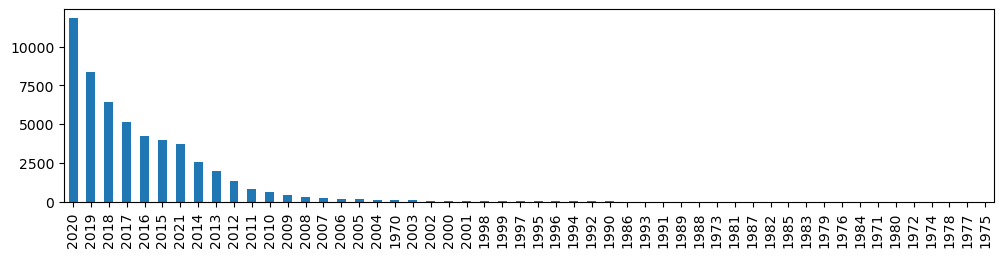

In [9]:
df.year.value_counts().plot(kind='bar', figsize=(12,2.5))

<Axes: >

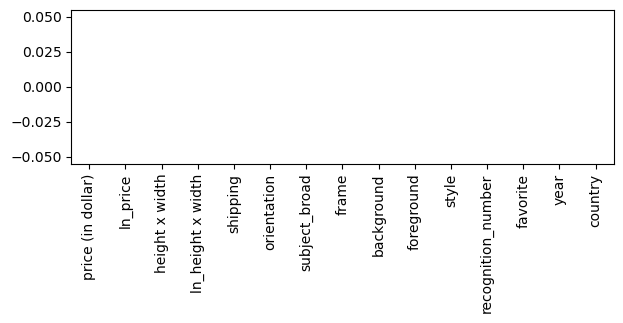

In [10]:
df.isnull().sum().plot(kind='bar',figsize=(7,2))

In [11]:
df.drop(['price (in dollar)'],axis=1, inplace=True)

In [12]:
df.rename(columns = {'ln_price':'price'}, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53414 entries, 0 to 53413
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               53414 non-null  float64
 1   height x width      53414 non-null  float64
 2   ln_height x width   53414 non-null  float64
 3   shipping            53414 non-null  object 
 4   orientation         53414 non-null  object 
 5   subject_broad       53414 non-null  object 
 6   frame               53414 non-null  object 
 7   background          53414 non-null  object 
 8   foreground          53414 non-null  object 
 9   style               53414 non-null  object 
 10  recognition_number  53414 non-null  int64  
 11  favorite            53414 non-null  int64  
 12  year                53414 non-null  int64  
 13  country             53414 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 5.7+ MB


In [14]:
catCols =[col for col in df.columns if df[col].dtype=="object" or df[col].dtype=="bool" ]

In [15]:
df[catCols]

,shipping,orientation,subject_broad,frame,background,foreground,style,country
0,Box,horizontal,nature,Framed,canvas,giclee,expressionism,slovakia
1,Box,vertical,nature,Framed,canvas,giclee,surrealism,australia
2,Box,vertical,place,Framed,canvas,giclee,realism,france
3,Box,horizontal,stilllife,Framed,paper,giclee,realism,us
4,Box,horizontal,nature,Framed,paper,giclee,impressionism abstract,germany
...,...,...,...,...,...,...,...,...
53409,Crate,vertical,business,NotFramed,canvas,acrylic,expressionism abstract,netherlands
53410,Box,vertical,animal,NotFramed,canvas,oil,realism,ukraine
53411,Crate,vertical,people,NotFramed,canvas,oil,expressionism,russia
53412,Tube,horizontal,place,NotFramed,canvas,oil,impressionism abstract,us


In [16]:
for cat in catCols:
    le=LabelEncoder()
    df[cat]=le.fit_transform(df[cat])

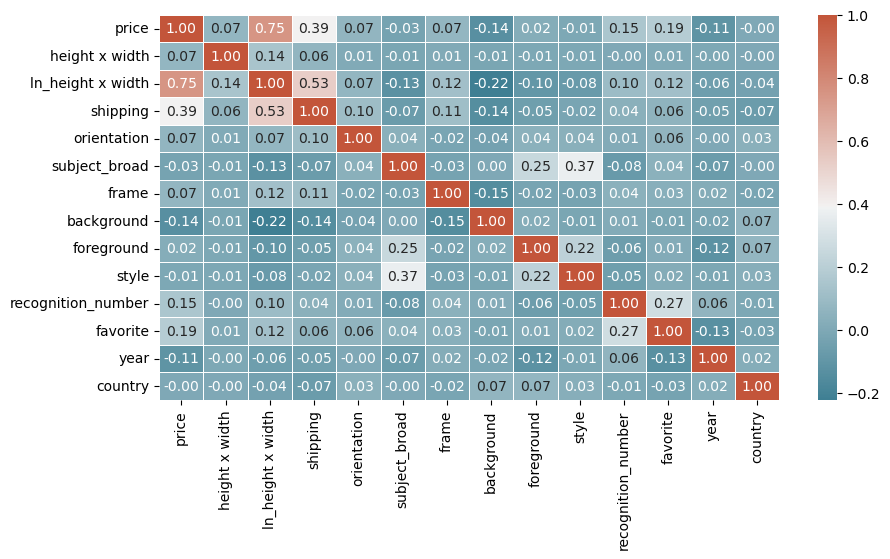

In [17]:
fig, ax=plt.subplots(figsize=(10,5))
ax=sns.heatmap(df.corr(),
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [18]:
sc=StandardScaler()
df[catCols]=sc.fit_transform(df[catCols])

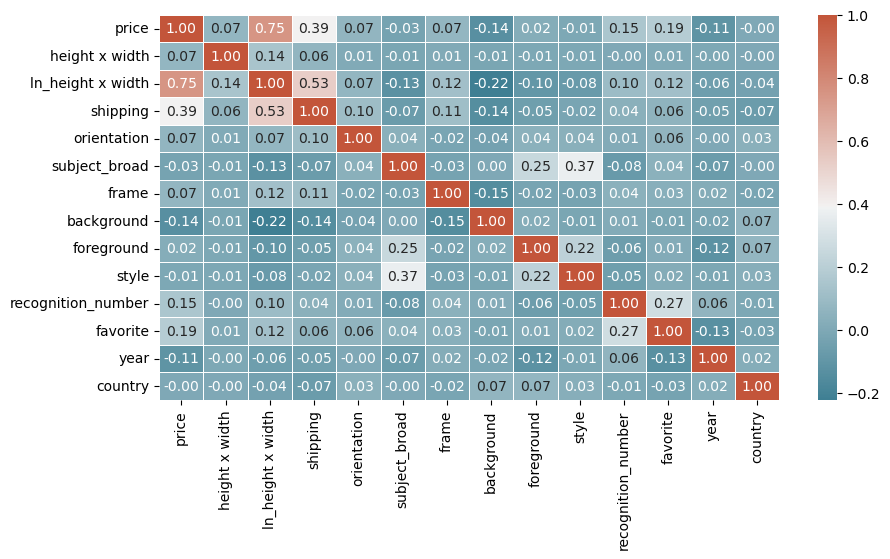

In [19]:
fig, ax=plt.subplots(figsize=(10,5))
ax=sns.heatmap(df.corr(),
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [30]:
corr_value=df.corr()
tril_index=np.tril_indices_from(corr_value)

In [31]:
corr_array=np.array(corr_value)
corr_array[np.tril_indices_from(corr_value)]=np.nan

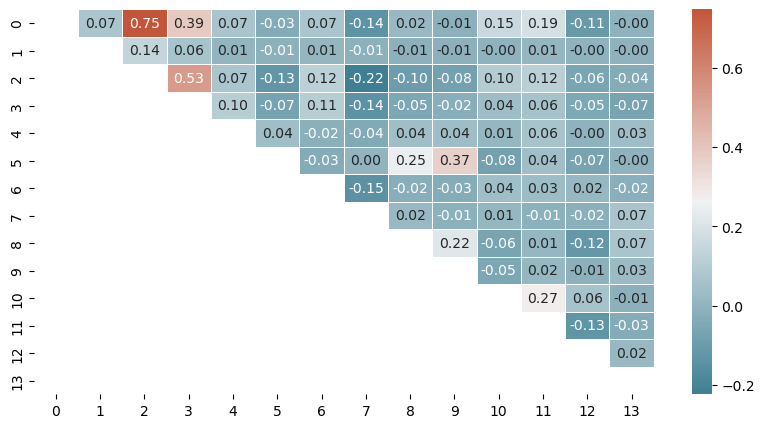

In [32]:
fig, ax=plt.subplots(figsize=(10,5))
ax=sns.heatmap((corr_array),
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [10]:
df.describe()

,price,height x width,ln_height x width,recognition_number,favorite,year
count,53414.000000,5.341400e+04,53414.000000,53414.000000,53414.000000,53414.000000
mean,7.440144,1.431937e+03,6.713023,1.175797,25.158198,2016.897948
std,1.005999,1.283429e+04,1.070322,0.866712,34.122652,4.628216
min,4.553877,4.000000e+00,1.386294,0.000000,0.000000,1970.000000
25%,6.756932,4.140000e+02,6.025866,1.000000,5.000000,2015.000000
50%,7.473069,9.922500e+02,6.899975,1.000000,14.000000,2018.000000
75%,8.124150,1.728000e+03,7.454720,2.000000,32.000000,2020.000000
max,11.524854,2.520000e+06,14.739770,3.000000,887.000000,2021.000000


In [11]:
df.year=df['year'].astype(int)

In [12]:
df

,price,height x width,ln_height x width,shipping,orientation,subject_broad,frame,background,foreground,style,recognition_number,favorite,year,country
0,4.553877,192.000000,5.257495,Box,horizontal,nature,Framed,canvas,giclee,expressionism,1,16,2015,slovakia
1,4.553877,192.000000,5.257495,Box,vertical,nature,Framed,canvas,giclee,surrealism,1,19,2012,australia
2,4.595120,192.000000,5.257495,Box,vertical,place,Framed,canvas,giclee,realism,3,24,2014,france
3,4.787492,80.000000,4.382027,Box,horizontal,stilllife,Framed,paper,giclee,realism,0,7,2013,us
4,4.787492,108.000000,4.682131,Box,horizontal,nature,Framed,paper,giclee,impressionism abstract,0,1,2001,germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53409,11.522876,2328.540039,7.752997,Crate,vertical,business,NotFramed,canvas,acrylic,expressionism abstract,1,133,2015,netherlands
53410,11.524854,464.920013,6.141865,Box,vertical,animal,NotFramed,canvas,oil,realism,0,0,2021,ukraine
53411,11.524854,309.290008,5.734279,Crate,vertical,people,NotFramed,canvas,oil,expressionism,1,21,2020,russia
53412,11.524854,1859.680054,7.528160,Tube,horizontal,place,NotFramed,canvas,oil,impressionism abstract,1,296,2018,us


In [13]:
catCols =[col for col in df.columns if df[col].dtype=="object" or df[col].dtype=="bool" ]
numCols =[col for col in df.columns if df[col].dtype=="int64" or df[col].dtype=="float64"]

In [14]:
catCols

['shipping',
 'orientation',
 'subject_broad',
 'frame',
 'background',
 'foreground',
 'style',
 'country']

In [15]:
numCols

['price',
 'height x width',
 'ln_height x width',
 'recognition_number',
 'favorite']

In [33]:
df1=df.copy()

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53414 entries, 0 to 53413
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               53414 non-null  float64
 1   height x width      53414 non-null  float64
 2   ln_height x width   53414 non-null  float64
 3   shipping            53414 non-null  float64
 4   orientation         53414 non-null  float64
 5   subject_broad       53414 non-null  float64
 6   frame               53414 non-null  float64
 7   background          53414 non-null  float64
 8   foreground          53414 non-null  float64
 9   style               53414 non-null  float64
 10  recognition_number  53414 non-null  int64  
 11  favorite            53414 non-null  int64  
 12  year                53414 non-null  int64  
 13  country             53414 non-null  float64
dtypes: float64(11), int64(3)
memory usage: 5.7 MB


In [35]:
df1

,price,height x width,ln_height x width,shipping,orientation,subject_broad,frame,background,foreground,style,recognition_number,favorite,year,country
0,4.553877,192.000000,5.257495,-0.762406,-0.020091,0.822858,-3.164363,-0.363321,0.089405,-0.546673,1,16,2015,0.409918
1,4.553877,192.000000,5.257495,-0.762406,1.197983,0.822858,-3.164363,-0.363321,0.089405,1.841376,1,19,2012,-1.927062
2,4.595120,192.000000,5.257495,-0.762406,1.197983,1.394263,-3.164363,-0.363321,0.089405,1.624281,3,24,2014,-1.179228
3,4.787492,80.000000,4.382027,-0.762406,-0.020091,1.965669,-3.164363,2.151661,0.089405,1.624281,0,7,2013,0.924054
4,4.787492,108.000000,4.682131,-0.762406,-0.020091,0.822858,-3.164363,2.151661,0.089405,0.972995,0,1,2001,-1.109119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53409,11.522876,2328.540039,7.752997,0.620008,1.197983,-0.434233,0.316019,-0.363321,-0.909024,-0.112482,1,133,2015,-0.127587
53410,11.524854,464.920013,6.141865,-0.762406,1.197983,-0.777076,0.316019,-0.363321,1.087834,1.624281,0,0,2021,0.853945
53411,11.524854,309.290008,5.734279,0.620008,1.197983,1.165701,0.316019,-0.363321,1.087834,-0.546673,1,21,2020,0.246330
53412,11.524854,1859.680054,7.528160,2.002422,-0.020091,1.394263,0.316019,-0.363321,1.087834,0.972995,1,296,2018,0.924054


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop(['price'], axis=1), df1.price, test_size=0.33, random_state=42)

In [38]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [42]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.0001,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [43]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.0001,2,0.1)},
                      cv = 5, scoring="neg_mean_absolute_percentage_error",verbose=3
                      )

In [44]:
model=search.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ..............model__alpha=0.0001;, score=-0.068 total time=   0.0s
[CV 2/5] END ..............model__alpha=0.0001;, score=-0.067 total time=   0.0s
[CV 3/5] END ..............model__alpha=0.0001;, score=-0.068 total time=   0.0s
[CV 4/5] END ..............model__alpha=0.0001;, score=-0.068 total time=   0.0s
[CV 5/5] END ..............model__alpha=0.0001;, score=-0.068 total time=   0.0s
[CV 1/5] END .model__alpha=0.10010000000000001;, score=-0.072 total time=   0.0s
[CV 2/5] END .model__alpha=0.10010000000000001;, score=-0.071 total time=   0.0s
[CV 3/5] END .model__alpha=0.10010000000000001;, score=-0.072 total time=   0.0s
[CV 4/5] END .model__alpha=0.10010000000000001;, score=-0.072 total time=   0.0s
[CV 5/5] END .model__alpha=0.10010000000000001;, score=-0.072 total time=   0.0s
[CV 1/5] END ..............model__alpha=0.2001;, score=-0.076 total time=   0.0s
[CV 2/5] END ..............model__alpha=0.2001;

In [45]:
model.score(X_test, y_test)

-0.0693105882083821

In [46]:
search.scoring.value()

AttributeError: 'str' object has no attribute 'value'

In [47]:
search.best_params_

{'model__alpha': 0.0001}

In [48]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [49]:
importance = np.abs(coefficients)

In [50]:
features = df1.columns.tolist()

In [51]:
np.array(features)[importance > 0]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 14 but corresponding boolean dimension is 13

In [52]:
search.neg_mean_squared_error

AttributeError: 'GridSearchCV' object has no attribute 'neg_mean_squared_error'

In [53]:
plt.plot(search_params_,neg_mean_Squared_error,label='Experiment')

NameError: name 'search_params_' is not defined

In [54]:
import warnings
warnings.filterwarnings('ignore',module='sklearn')

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split


X=df1.drop(['price'],axis=1)
Y=df1.price

train, test= train_test_split(df1, test_size=0.25, random_state=42)

In [55]:
df.skew()

price                  -0.019657
height x width        163.376126
ln_height x width      -0.473766
shipping                0.913509
orientation            -0.030472
subject_broad           0.503529
frame                  -2.848424
background              2.525375
foreground              0.242251
style                   0.436051
recognition_number      0.541416
favorite                4.122836
year                   -4.420699
country                -0.568975
dtype: float64

In [56]:
rr=Ridge(alpha=0.0001)
rf=rr.fit(X,Y)
y_predict_rr=rf.predict(X)

lass=Lasso(alpha=0.0001)
laf=lass.fit(X,Y)
y_predict_lr=laf.predict(X)

NameError: name 'y_redict_lr' is not defined

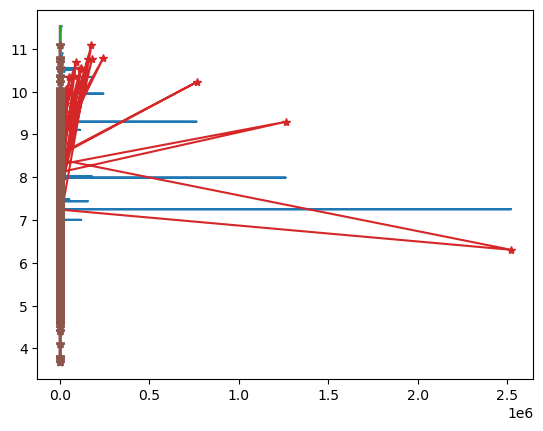

In [57]:
plt.plot(X,Y,label='Experiment')
plt.plot(X, y_predict_rr, marker='*', label='Ridge')
plt.plot(X,y_redict_lr, marker='o', label='Lasso')

plt.legend()

ax=plt.gca()

In [58]:
## Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Polynomial Features
degree=5
pf=PolynomialFeatures(degree)
lr=LinearRegression()

X=df1.drop(['price'],axis=1)
Y=df1.price

#Create the feature and fit the model
X_poly=pf.fit_transform(X)
lr=lr.fit_transform(X,Y)
Y_pred=lr.predict(X_poly)

AttributeError: 'LinearRegression' object has no attribute 'fit_transform'